In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

In [41]:
# Define the base directory path
base_dir = "/Users/marcozamp/Desktop/hpc_project/Excercise_1/bcast/results"

# Define file paths using os.path.join to concatenate the base directory with the specific file names
bcast_paths = {
    "bcast_chain": os.path.join(base_dir, "bcast_chain.csv"),
    "bcast_default": os.path.join(base_dir, "bcast_default.csv"),
    "bcast_binarytree": os.path.join(base_dir, "bcast_binarytree.csv"),
    "bcast_pipeline": os.path.join(base_dir, "bcast_pipeline.csv")
}


for name, path in bcast_paths.items():
    # Read CSV into DataFrame
    df = pd.read_csv(path)
    # Create DataFrame with dynamic name using globals()
    globals()[f"df_{name}"] = df

In [33]:
# Filter the DataFrame for each allocation type
df_core_chain = df_bcast_chain[df_bcast_default['Allocation'] == 'core']
df_node_chain = df_bcast_chain[df_bcast_default['Allocation'] == 'node']
df_socket_chain = df_bcast_chain[df_bcast_default['Allocation'] == 'socket']

# Filter the DataFrame for each allocation type for pipeline algorithm
df_core_pipeline = df_bcast_pipeline[df_bcast_pipeline['Allocation'] == 'core']
df_node_pipeline = df_bcast_pipeline[df_bcast_pipeline['Allocation'] == 'node']
df_socket_pipeline = df_bcast_pipeline[df_bcast_pipeline['Allocation'] == 'socket']

# Filter the DataFrame for each allocation type for default algorithm
df_core_default = df_bcast_default[df_bcast_default['Allocation'] == 'core']
df_node_default = df_bcast_default[df_bcast_default['Allocation'] == 'node']
df_socket_default = df_bcast_default[df_bcast_default['Allocation'] == 'socket']

# Filter the DataFrame for each allocation type for binarytree algorithm
df_core_binarytree = df_bcast_binarytree[df_bcast_binarytree['Allocation'] == 'core']
df_node_binarytree = df_bcast_binarytree[df_bcast_binarytree['Allocation'] == 'node']
df_socket_binarytree = df_bcast_binarytree[df_bcast_binarytree['Allocation'] == 'socket']


/var/folders/tp/vfdk9pcj66g2trgt19fh08480000gn/T/ipykernel_5876/1937244862.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_core_chain = df_bcast_chain[df_bcast_default['Allocation'] == 'core']
/var/folders/tp/vfdk9pcj66g2trgt19fh08480000gn/T/ipykernel_5876/1937244862.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_node_chain = df_bcast_chain[df_bcast_default['Allocation'] == 'node']
/var/folders/tp/vfdk9pcj66g2trgt19fh08480000gn/T/ipykernel_5876/1937244862.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_socket_chain = df_bcast_chain[df_bcast_default['Allocation'] == 'socket']


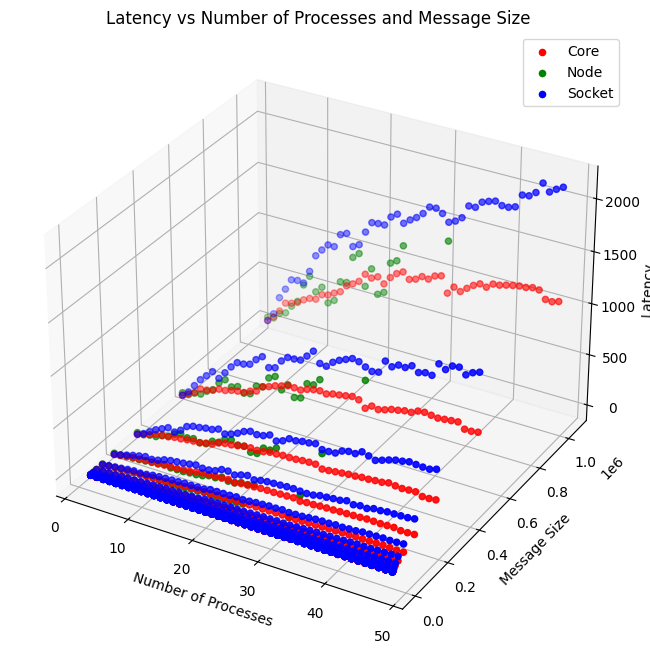

In [42]:
# Create a single plot with different colors for each allocation type
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each allocation type
for df, allocation, color in zip([df_core, df_node, df_socket], ['Core', 'Node', 'Socket'], ['r', 'g', 'b']):
    ax.scatter(df['Processes'], df['MessageSize'], df['Latency'], c=color, label=allocation, marker='o')

# Set labels and title
ax.set_xlabel('Number of Processes')
ax.set_ylabel('Message Size')
ax.set_zlabel('Latency')
ax.set_title('Latency vs Number of Processes and Message Size')

# Add legend
ax.legend()

plt.show()


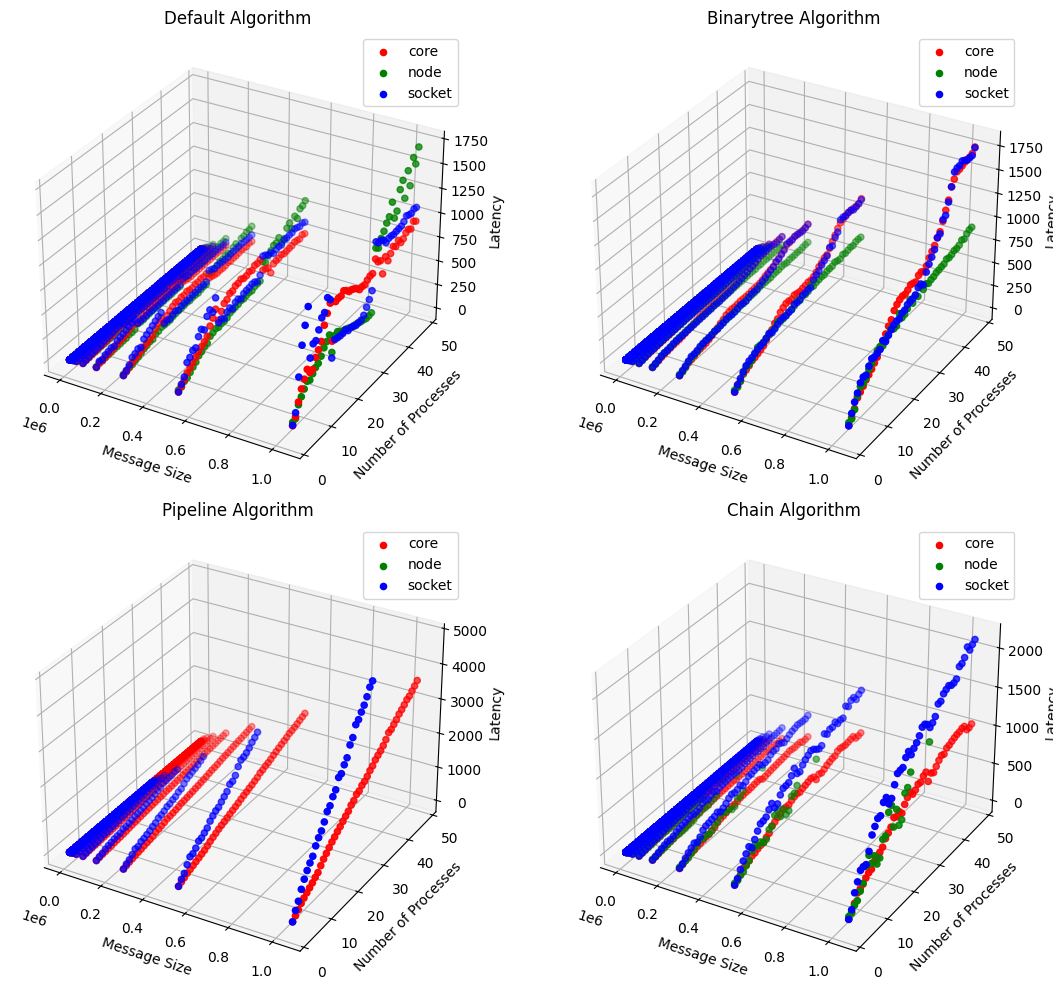

In [51]:
# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': '3d'})

# Define the list of algorithms and their corresponding DataFrames
algorithms = ['Default', 'Binarytree', 'Pipeline', 'Chain']
dfs = [df_bcast_default, df_bcast_binarytree, df_bcast_pipeline, df_bcast_chain]

# Iterate over each subplot and corresponding algorithm's DataFrame
for ax, algorithm, df in zip(axs.flatten(), algorithms, dfs):
    # Iterate over each group-by option (node, core, socket)
    for allocation, color in zip(['core', 'node', 'socket'], ['r', 'g', 'b']):
        # Filter DataFrame based on allocation type
        df_allocation = df[df['Allocation'] == allocation]
        # Scatter plot for the current group-by option
        ax.scatter(df_allocation['MessageSize'], df_allocation['Processes'], df_allocation['Latency'], c=color, label=allocation, marker='o')

    # Set labels and title
    ax.set_xlabel('Message Size')  # Switched with 'Number of Processes'
    ax.set_ylabel('Number of Processes')  # Switched with 'Message Size'
    ax.set_zlabel('Latency')
    ax.set_title(f'{algorithm} Algorithm')
    ax.legend()

plt.tight_layout()
plt.show()
